# Análisis exploratorio con Python y pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv("salesmonthly.csv")
# Ver las primeras filas del database.
df.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
0,2014-01-31,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.2
1,2014-02-28,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.2
2,2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.4
3,2014-04-30,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.7
4,2014-05-31,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.7


In [5]:
# Nombre de las columnas y tipo de datos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   datum   70 non-null     object 
 1   M01AB   70 non-null     float64
 2   M01AE   70 non-null     float64
 3   N02BA   70 non-null     float64
 4   N02BE   70 non-null     float64
 5   N05B    70 non-null     float64
 6   N05C    70 non-null     float64
 7   R03     70 non-null     float64
 8   R06     70 non-null     float64
dtypes: float64(8), object(1)
memory usage: 5.1+ KB


## Información General Sales Monthly
70 filas -> 70 meses

1 columna de fecha: datum.

8 columnas numéricas -> ventas por categoría de medicamentos.


Las columnas M01AB, N02BE... son códigos ATC, cada una es un tipo de medicamento distinto.

El análisis sera:
- Evolución temporal.
- Comparación entre categorías.
- Tendencias.


In [7]:
df.describe()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,149.992000,116.514286,115.020843,892.542071,262.118571,17.842857,167.675000,86.662571
std,31.485325,27.889336,31.245899,338.843908,85.060930,8.481242,81.767979,45.859336
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,137.490000,103.518250,94.375000,648.187500,223.750000,12.000000,112.000000,49.875000
50%,154.635000,114.840000,117.225000,865.824500,250.300000,18.000000,160.000000,74.100000
75%,169.000000,128.359750,133.837500,1061.580000,293.650000,23.000000,218.250000,119.807500
max,211.130000,222.351000,191.600000,1856.815000,492.000000,50.000000,386.000000,213.040000


In [15]:
# Covertir datum a fecha, es decir, pasaría a datetime64.
df["datum"] = pd.to_datetime(df["datum"])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   datum        70 non-null     datetime64[ns]
 1   M01AB        70 non-null     float64       
 2   M01AE        70 non-null     float64       
 3   N02BA        70 non-null     float64       
 4   N02BE        70 non-null     float64       
 5   N05B         70 non-null     float64       
 6   N05C         70 non-null     float64       
 7   R03          70 non-null     float64       
 8   R06          70 non-null     float64       
 9   total_sales  70 non-null     float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 5.6 KB


## Ventas totales por mes.

In [10]:
df["total_sales"] = df.iloc[:, 1:].sum(axis=1)
df.head()
# usamos [:, 1:] para que use todas las columnas menos datum.

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,total_sales
0,2014-01-31,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.2,3642.220
1,2014-02-28,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.2,3948.940
2,2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.4,3213.440
3,2014-04-30,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.7,2859.350
4,2014-05-31,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.7,3012.606


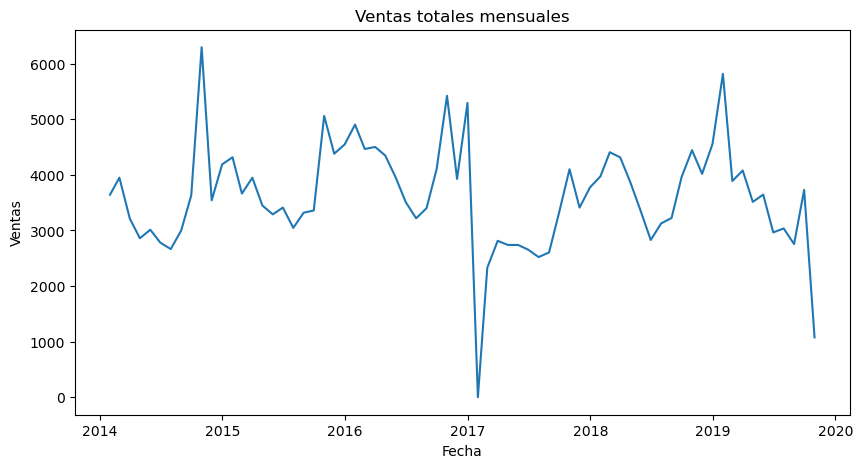

In [11]:
# Gráfico de ventas totales.
plt.figure(figsize=(10,5))
plt.plot(df["datum"], df["total_sales"])
plt.title("Ventas totales mensuales")
plt.xlabel("Fecha")
plt.ylabel("Ventas")
plt.show()

## Comparar categorías.

In [12]:
# Ventas totales por categoría.
category_sales = df.iloc[:, 1:-1].sum()
category_sales

M01AB    10499.440
M01AE     8156.000
N02BA     8051.459
N02BE    62477.945
N05B     18348.300
N05C      1249.000
R03      11737.250
R06       6066.380
dtype: float64

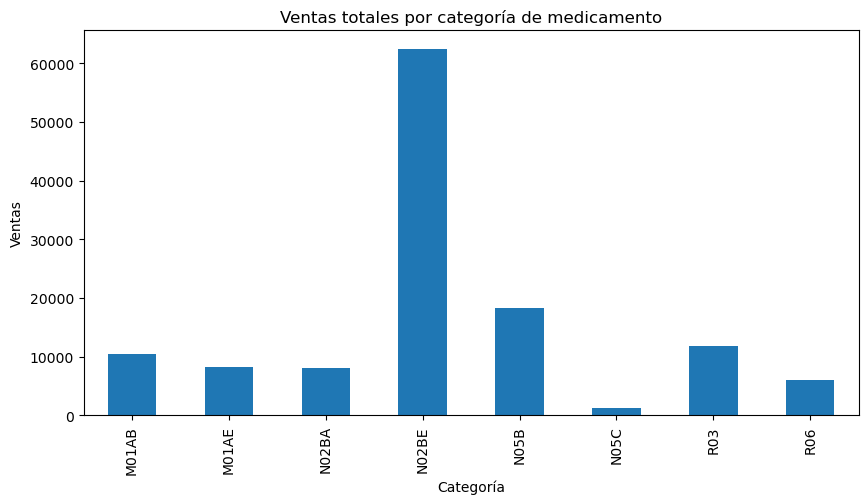

In [13]:
# Gráfico por categorías.
category_sales.plot(kind="bar", figsize=(10,5))
plt.title("Ventas totales por categoría de medicamento")
plt.xlabel("Categoría")
plt.ylabel("Ventas")
plt.show()

## Top 3 categorías más vendidas.

In [14]:
category_sales.sort_values(ascending=False).head(3)

N02BE    62477.945
N05B     18348.300
R03      11737.250
dtype: float64

## CONCLUSIONES.

El análisis de los datos de ventas mensuales muestra una variación significativa a lo largo del tiempo, con picos más elevados en los primeros meses del año 2014, especialmente entre enero y febrero, y una tendencia descendente en los meses posteriores. Este comportamiento sugiere posibles efectos estacionales en la demanda de determinados medicamentos.

Al comparar las distintas categorías de productos, se observa que la categoría **N02BE** concentra con diferencia el mayor volumen de ventas totales, lo que indica una alta demanda sostenida frente al resto de medicamentos analizados. Le siguen las categorías **N05B** y **R03**, aunque con un volumen considerablemente inferior.

Estos resultados permiten identificar qué tipos de medicamentos tienen mayor impacto en las ventas globales y pueden servir como apoyo para la planificación de stock, la priorización de productos y la toma de decisiones comerciales. Este tipo de análisis demuestra el valor del uso de datos históricos para comprender patrones de consumo y optimizar estrategias empresariales.
